# Загрузка данных 

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def from_json_to_df(path: str): 
    data = []

    with open(path, 'r') as f:
        for line in f:
            sample = json.loads(line)
            post_text = sample['text']
            for comment in sample['comments']:
                comment_text = comment['text']
                score = comment['score']
                data.append([post_text, comment_text, score])

    return pd.DataFrame(data, columns=['post_text', 'comment_text', 'score'])

In [4]:
train_df = from_json_to_df("C:\\Users\\marty\\Desktop\\data\\ranking_train.jsonl")
print(train_df.shape,
      train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440535 entries, 0 to 440534
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   post_text     440535 non-null  object
 1   comment_text  440535 non-null  object
 2   score         440535 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.1+ MB
(440535, 3) None


In [6]:
train_df.head(10)

,post_text,comment_text,score
0,How many summer Y Combinator fundees decided n...,Going back to school is not identical with giv...,0
1,How many summer Y Combinator fundees decided n...,There will invariably be those who don't see t...,1
2,How many summer Y Combinator fundees decided n...,For me school is a way to be connected to what...,2
3,How many summer Y Combinator fundees decided n...,I guess it really depends on how hungry you ar...,3
4,How many summer Y Combinator fundees decided n...,I know pollground decided to go back to school...,4
5,CBS acquires last.fm for $280m,It will be curious to see where this heads in ...,0
6,CBS acquires last.fm for $280m,Does this mean that there's now a big-name com...,1
7,CBS acquires last.fm for $280m,Also on BBC News: http://news.bbc.co.uk/1/low...,2
8,CBS acquires last.fm for $280m,I don't understand what they do that is worth ...,3
9,CBS acquires last.fm for $280m,sold out too cheaply. given their leadership p...,4


У каждого поста выгружено по 5 комментариев, каждому из которых присвоен балл популярности комментария: 0 - самый популярный комментарий, 4 - самый непопулярный

## Первичный анализ 

<b> Гипотеза 1: </b> чем больше комментарий (чем больше в нем слов), тем более он информативен, тем более он популярный

In [7]:
# подсчитаем количество слов 
train_df['word_count_comment'] = train_df['comment_text'].apply(lambda x : len(str(x).split(" ")))

display(train_df[['comment_text', 'word_count_comment', 'score']].head())

,comment_text,word_count_comment,score
0,Going back to school is not identical with giv...,186,0
1,There will invariably be those who don't see t...,76,1
2,For me school is a way to be connected to what...,91,2
3,I guess it really depends on how hungry you ar...,65,3
4,I know pollground decided to go back to school...,14,4


Text(0, 0.5, 'Количество комментариев')

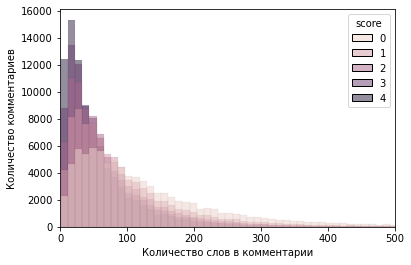

In [9]:
# график соотношения количества слов в комментариях.
plt.clf()
sns.histplot(data=train_df, x="word_count_comment", hue="score", bins=1000)
plt.xlim(0, 500)
plt.xlabel("Количество слов в комментарии")
plt.ylabel("Количество комментариев")

In [8]:
target_0 = train_df.loc[train_df['score'] == 0]
target_1 = train_df.loc[train_df['score'] == 1]
target_2 = train_df.loc[train_df['score'] == 2]
target_3 = train_df.loc[train_df['score'] == 3]
target_4 = train_df.loc[train_df['score'] == 4]

In [9]:
print("Среднее количество слов в самом популярном комментарии (0 score) -", target_0['word_count_comment'].mean() )
print("Медианное количество слов в самом популярном комментарии (0 score) -", target_0['word_count_comment'].median() )
print ()
print("Среднее количество слов в  популярном комментарии (1 score) -", target_1['word_count_comment'].mean() )
print("Медианное количество слов в популярном комментарии (1 score) -", target_1['word_count_comment'].median() )
print()
print("Среднее количество слов в среднем по популярности комментарии (2 score) -", target_2['word_count_comment'].mean() )
print("Медианное количество слов в среднем по популярности комментарии (2 score) -", target_2['word_count_comment'].median() )
print()
print("Среднее количество слов в  непопулярном комментарии (3 score) -", target_3['word_count_comment'].mean() )
print("Медианное количество слов в непопулярном комментарии (3 score) -", target_3['word_count_comment'].median() )
print()
print("Среднее количество слов в самом непопулярном комментарии (4 score) -", target_4['word_count_comment'].mean() )
print("Медианное количество слов в самом непопулярном комментарии (4 score) -", target_4['word_count_comment'].median() )
print()


Среднее количество слов в самом популярном комментарии (0 score) - 141.18155197657393
Медианное количество слов в самом популярном комментарии (0 score) - 99.0

Среднее количество слов в  популярном комментарии (1 score) - 96.47291361639824
Медианное количество слов в популярном комментарии (1 score) - 67.0

Среднее количество слов в среднем по популярности комментарии (2 score) - 77.67884504068917
Медианное количество слов в среднем по популярности комментарии (2 score) - 53.0

Среднее количество слов в  непопулярном комментарии (3 score) - 66.69383817403839
Медианное количество слов в непопулярном комментарии (3 score) - 44.0

Среднее количество слов в самом непопулярном комментарии (4 score) - 57.97538220572713
Медианное количество слов в самом непопулярном комментарии (4 score) - 38.0



<b> Вывод по первой гипотизе:</b> Существует значительная разница между количеством слов в популярных и непопулярных комментариях. Медианное количество слов в самых популярном комментарии для каждого поста почти в два раза больше, чем в самом непопулярном. 

<b> Гипотеза 2: </b> В популярных комментариях (так как они более информативны) используются более сложные, более длинные (многобуквенные) слова.  

In [10]:
# посчитаем среднее количество букв в словах в комментариях 
train_df['characters'] = train_df['comment_text'].str.len()
train_df['mean_of_characters_per_words'] = train_df['characters']/train_df['word_count_comment']
train_df.head(3)

,post_text,comment_text,score,word_count_comment,characters,mean_of_characters_per_words
0,How many summer Y Combinator fundees decided n...,Going back to school is not identical with giv...,0,186,998,5.365591
1,How many summer Y Combinator fundees decided n...,There will invariably be those who don't see t...,1,76,414,5.447368
2,How many summer Y Combinator fundees decided n...,For me school is a way to be connected to what...,2,91,488,5.362637


In [11]:
target_0 = train_df.loc[train_df['score'] == 0]
target_1 = train_df.loc[train_df['score'] == 1]
target_2 = train_df.loc[train_df['score'] == 2]
target_3 = train_df.loc[train_df['score'] == 3]
target_4 = train_df.loc[train_df['score'] == 4]

In [12]:
print("Среднее количество букв в используемых словах в самом популярном комментарии (0 score) -", round(target_0['mean_of_characters_per_words'].mean(),2 ))
print("Медианное количество букв в используемых словах в самом популярном комментарии (0 score) -", round(target_0['mean_of_characters_per_words'].median(),2 ) )
print()
print("Среднее количество букв в используемых словах в  популярном комментарии (1 score) -", round(target_1['mean_of_characters_per_words'].mean(),2) )
print("Медианное количество букв в используемых словах в популярном комментарии (1 score) -", round(target_1['mean_of_characters_per_words'].median(),2) )
print()
print("Среднее количество букв в используемых словах в среднем по популярности комментарии (2 score) -", round(target_2['mean_of_characters_per_words'].mean(), 2 ) )
print("Медианное количество букв в используемых словах в среднем по популярности комментарии (2 score) -", round(target_2['mean_of_characters_per_words'].median(), 2) )
print()
print("Среднее количество букв в используемых словах в  непопулярном комментарии (3 score) -", round(target_3['mean_of_characters_per_words'].mean(), 2) )
print("Медианное количество букв в используемых словах в непопулярном комментарии (3 score) -", round(target_3['mean_of_characters_per_words'].median(), 2) )
print()
print("Среднее количество букв в используемых словах в самом непопулярном комментарии (4 score) -", round(target_4['mean_of_characters_per_words'].mean(), 2) )
print("Медианное количество букв в используемых словах в самом непопулярном комментарии (4 score) -", round(target_4['mean_of_characters_per_words'].median(), 2) )
print()


Среднее количество букв в используемых словах в самом популярном комментарии (0 score) - 6.57
Медианное количество букв в используемых словах в самом популярном комментарии (0 score) - 5.9

Среднее количество букв в используемых словах в  популярном комментарии (1 score) - 6.56
Медианное количество букв в используемых словах в популярном комментарии (1 score) - 5.88

Среднее количество букв в используемых словах в среднем по популярности комментарии (2 score) - 6.58
Медианное количество букв в используемых словах в среднем по популярности комментарии (2 score) - 5.87

Среднее количество букв в используемых словах в  непопулярном комментарии (3 score) - 6.59
Медианное количество букв в используемых словах в непопулярном комментарии (3 score) - 5.85

Среднее количество букв в используемых словах в самом непопулярном комментарии (4 score) - 6.56
Медианное количество букв в используемых словах в самом непопулярном комментарии (4 score) - 5.82



<b> Вывод по второй гипотезе: </b> мы можем обнаружить устойчивую разницу между популярностью комментария и длиной слов, которые в нем используются. Популярные комментарии действительно используют более длинные слова в сравнении с непопулярными комментариями.

<b> Гипотеза 3: </b> В популярных комментариях используются более сложные предложения. Чаще используются сложносочененные предложения, перечисления. Мы сможем увидеть больше запятых в популярных комментариях. 

In [13]:
# количество запятых в комментарии и количество запятых на количество слов 
train_df['commas'] = train_df['comment_text'].apply(lambda x : x.count(",") )
train_df['commas_per_words_count'] = train_df['word_count_comment']/train_df['commas']

train_df.head(3)

,post_text,comment_text,score,word_count_comment,characters,mean_of_characters_per_words,commas,commas_per_words_count
0,How many summer Y Combinator fundees decided n...,Going back to school is not identical with giv...,0,186,998,5.365591,7,26.571429
1,How many summer Y Combinator fundees decided n...,There will invariably be those who don't see t...,1,76,414,5.447368,3,25.333333
2,How many summer Y Combinator fundees decided n...,For me school is a way to be connected to what...,2,91,488,5.362637,0,inf


In [16]:
target_0 = train_df.loc[train_df['score'] == 0]
target_1 = train_df.loc[train_df['score'] == 1]
target_2 = train_df.loc[train_df['score'] == 2]
target_3 = train_df.loc[train_df['score'] == 3]
target_4 = train_df.loc[train_df['score'] == 4]

Text(0, 0.5, 'Количество комментариев')

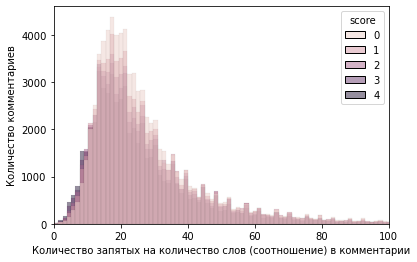

In [17]:
plt.clf()
sns.histplot(data=train_df, x="commas_per_words_count", bins=1000, hue="score")
plt.xlim(0, 100)
plt.xlabel("Количество запятых на количество слов (соотношение) в комментарии")
plt.ylabel("Количество комментариев")

In [18]:
print("Медианное соотношения количества запятых/на количество используемых слов в самом популярном комментарии (0 score) -", round(target_0['commas_per_words_count'].median(),2 ) )
print()
print("Медианное соотношения количества запятых/на количество используемых слов в популярном комментарии (1 score) -", round(target_1['commas_per_words_count'].median(),2) )
print()
print("Медианное соотношения количества запятых/на количество используемых слов в среднем по популярности комментарии (2 score) -", round(target_2['commas_per_words_count'].median(), 2) )
print()
print("Медианное соотношения количества запятых/на количество используемых слов в непопулярном комментарии (3 score) -", round(target_3['commas_per_words_count'].median(), 2) )
print()
print("Медианное соотношения количества запятых/на количество используемых слов в самом непопулярном комментарии (4 score) -", round(target_4['commas_per_words_count'].median(), 2) )


Медианное соотношения количества запятых/на количество используемых слов в самом популярном комментарии (0 score) - 25.4

Медианное соотношения количества запятых/на количество используемых слов в популярном комментарии (1 score) - 27.33

Медианное соотношения количества запятых/на количество используемых слов в среднем по популярности комментарии (2 score) - 29.0

Медианное соотношения количества запятых/на количество используемых слов в непопулярном комментарии (3 score) - 31.0

Медианное соотношения количества запятых/на количество используемых слов в самом непопулярном комментарии (4 score) - 34.0


<b> Вывод по третей гипотезе: </b> контринтуитивный вывод, однако в более популярных комментариях меньше количество запятых на количество слов в комментарии. Популярные комментаторы реже используют запятые. Возможно, меньшее количество запятых означает более простую и понятную форму изложения мысли. 